<a href="https://colab.research.google.com/github/zzhining/financial_data_analysis/blob/main/stock_market_analysis_prediction_using_lr_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 환경설정

In [3]:
pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 4.4 MB/s eta 0:00:00


# 1. 데이터 불러오기

삼성전자 주가 불러오기([야후파이낸스](https://finance.yahoo.com/))

In [5]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from datetime import datetime

# 분석할 기간
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df = fdr.DataReader('005930', start = start, end = end)
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-11-01,67500,68900,67300,68600,13775256,0.025411
2023-11-02,70000,70000,69400,69700,16350031,0.016035
2023-11-03,69700,70200,69500,69600,10322234,-0.001435
2023-11-06,69800,70900,69300,70900,22228489,0.018678
2023-11-07,70600,70900,70000,70900,17228731,0.000000


# 2. 데이터 전처리



## 2.1. Time 컬럼 추가

In [6]:
df['Time'] = np.arange(len(df.index))
df.head()

,Open,High,Low,Close,Volume,Change,Time
Date,,,,,,,
2023-11-01,67500,68900,67300,68600,13775256,0.025411,0
2023-11-02,70000,70000,69400,69700,16350031,0.016035,1
2023-11-03,69700,70200,69500,69600,10322234,-0.001435,2
2023-11-06,69800,70900,69300,70900,22228489,0.018678,3
2023-11-07,70600,70900,70000,70900,17228731,0.000000,4


<Axes: xlabel='Time', ylabel='Close'>

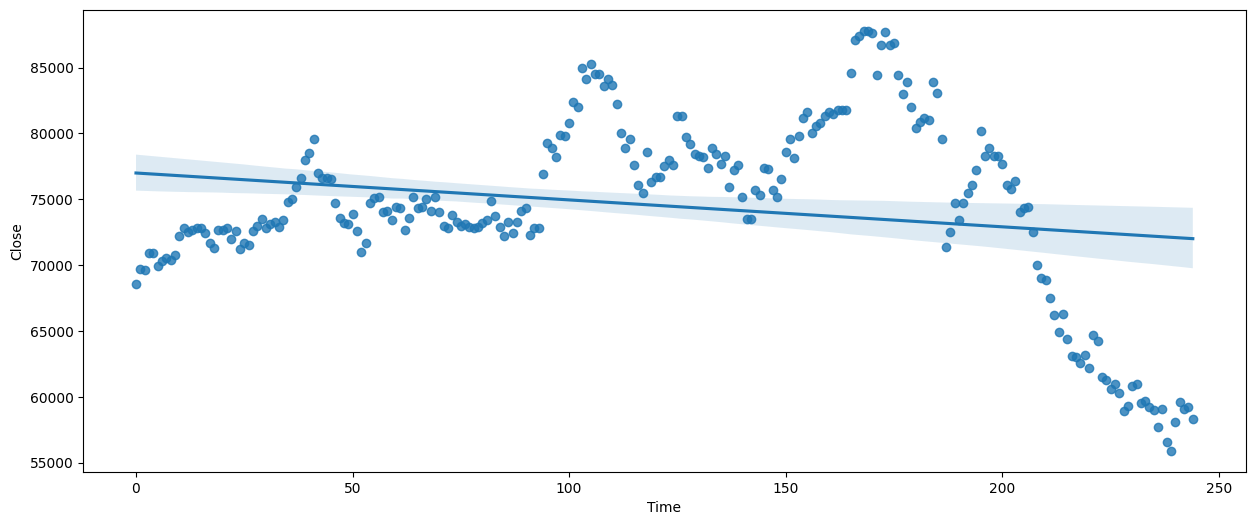

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.regplot(x='Time', y='Close', data=df)

## 2.2. Lag_1 컬럼 추가

In [9]:
df['Lag_1'] = df['Close'].shift(1)
df2 = df.reindex(columns=['Close', 'Lag_1'])
df2.head()

,Close,Lag_1
Date,,
2023-11-01,68600,NaN
2023-11-02,69700,68600.0
2023-11-03,69600,69700.0
2023-11-06,70900,69600.0
2023-11-07,70900,70900.0


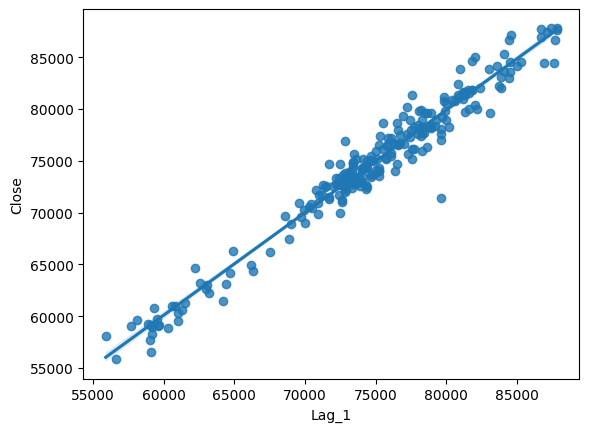

In [10]:
ax = sns.regplot(x='Lag_1', y='Close', data=df)

# 3. 학습


## 3.1. LinearRegression(1)
 - X: Time
 - y: Close

In [11]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
df['y_pred'] = model.predict(X)

In [13]:
df.head()

,Open,High,Low,Close,Volume,Change,Time,Lag_1,y_pred
Date,,,,,,,,,
2023-11-01,67500,68900,67300,68600,13775256,0.025411,0,NaN,76993.758089
2023-11-02,70000,70000,69400,69700,16350031,0.016035,1,68600.0,76973.320794
2023-11-03,69700,70200,69500,69600,10322234,-0.001435,2,69700.0,76952.883500
2023-11-06,69800,70900,69300,70900,22228489,0.018678,3,69600.0,76932.446205
2023-11-07,70600,70900,70000,70900,17228731,0.000000,4,70900.0,76912.008911


<Axes: xlabel='Date', ylabel='Close'>

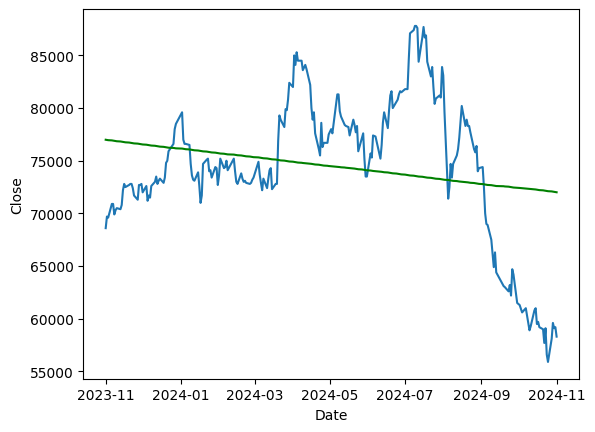

In [14]:
sns.lineplot(x= df.index, y=df['Close'])
sns.lineplot(x= df.index, y=df['y_pred'], color="g")

<Axes: xlabel='Close', ylabel='y_pred'>

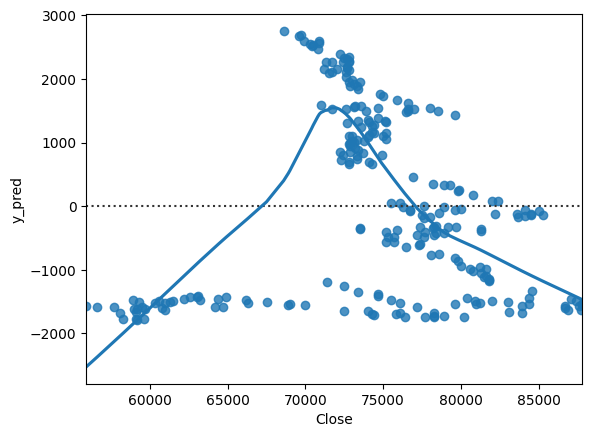

In [15]:
sns.residplot(x=df['Close'], y=df['y_pred'], lowess=True)

## 3.2. LinearRegression(2)
 - X: Lag_1
 - y: Close

In [16]:
df2.dropna(inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression

X = df2.loc[:, ['Lag_1']]
y = df2.loc[:, 'Close']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

df2['y_pred'] = model.predict(X)

<Axes: xlabel='Date', ylabel='Close'>

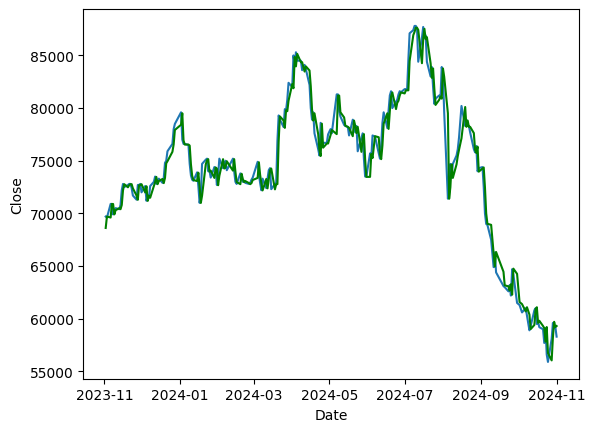

In [18]:
sns.lineplot(x= df2.index, y=df2['Close'])
sns.lineplot(x= df2.index, y=df2['y_pred'], color="g")

<Axes: xlabel='Close', ylabel='y_pred'>

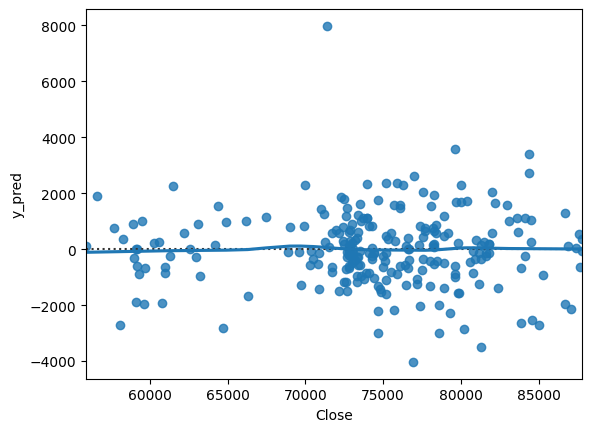

In [19]:
sns.residplot(x=df2['Close'], y=df2['y_pred'], lowess=True)

In [20]:
df3 = df2.iloc[0:200] #train
df4 = df2.iloc[200:] #test

In [21]:
X = df3.loc[:, ['Lag_1']]
y = df3.loc[:, 'Close']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
X = df4.loc[:, ['Lag_1']]
y = df4.loc[:, 'Close']
y, X = y.align(X, join='inner')

In [23]:
df4['y_pred2'] = model.predict(X)

<ipython-input-23-a1bbd950564e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['y_pred2'] = model.predict(X)


<Axes: xlabel='Date', ylabel='Close'>

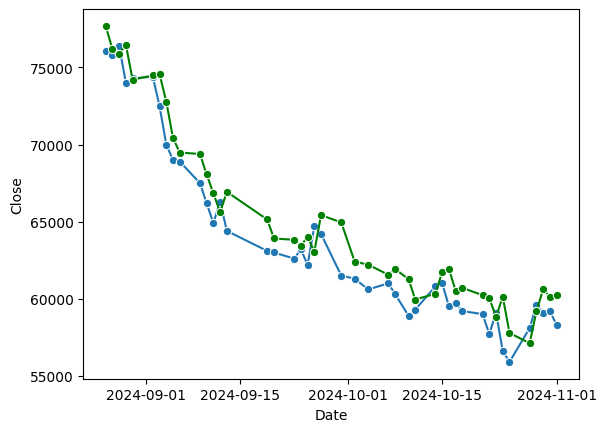

In [24]:
sns.lineplot(x= df4.index, y=df4['Close'], marker ="o")
sns.lineplot(x= df4.index, y=df4['y_pred2'], color="g", marker ="o")

<Axes: xlabel='Close', ylabel='y_pred'>

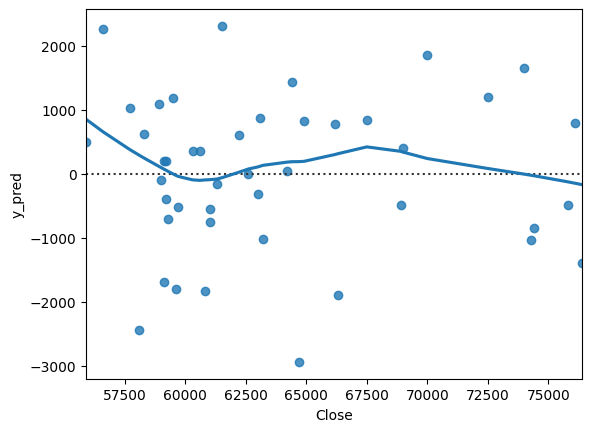

In [25]:
sns.residplot(x=df4['Close'], y=df4['y_pred'], lowess=True)

## 3.3. LSTM

### 3.3.1 데이터 전처리

In [26]:
df.describe()

,Open,High,Low,Close,Volume,Change,Time,Lag_1,y_pred
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.000000,244.000000,245.000000
mean,74617.142857,75289.387755,73846.938776,74500.408163,1.992897e+07,-0.000395,122.000000,74566.803279,74500.408163
std,6892.508406,6853.870633,6798.206792,6879.111277,8.968446e+06,0.018236,70.869599,6814.134761,1448.382855
min,55700.000000,56900.000000,55700.000000,55900.000000,6.676685e+06,-0.103015,0.000000,55900.000000,72007.058238
25%,72400.000000,73000.000000,72000.000000,72500.000000,1.328308e+07,-0.010651,61.000000,72500.000000,73253.733201
50%,74600.000000,75200.000000,73700.000000,74700.000000,1.851490e+07,0.000000,122.000000,74700.000000,74500.408163
75%,79200.000000,79800.000000,78000.000000,78900.000000,2.424758e+07,0.008872,183.000000,78900.000000,75747.083126
max,88500.000000,88800.000000,87100.000000,87800.000000,5.769127e+07,0.056319,244.000000,87800.000000,76993.758089


In [27]:
# filter: Close 컬럼이 포함된 DataFrame 추출
# (참고) df['Close'] : Series가 반환
dataset = df.filter(['Close']).values

# 95%에 해당하는 값은 학습용 데이터 셋으로 설정(주의: 시계열데이터이기 때문에 train_test_split()사용하지 않음)
training_data_len = int(np.ceil(len(dataset) * .95 ))
training_data_len

233

In [28]:
from sklearn.preprocessing import StandardScaler

# 신경망: 정규화(scailing)를 하는것이 예측 성능을 높이는데 도움
# 평균:0, 표준편차:1을 기준으로 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print('평균: {:.2f}, 표준편차: {}'.format(scaled_data.mean(), scaled_data.std()))

평균: -0.00, 표준편차: 0.9999999999999999


In [29]:
# X: 1일 ~ 60일, 2일 ~ 61일  ...
# Y: 61일      , 62일   ...
train_data = scaled_data[0:int(training_data_len), :] # 전체 데이터 셋의 95%(600개)
test_data = scaled_data[training_data_len - 60: , :]

x_train = []
y_train = []
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

print("x_train: {}, y_train: {}, x_test: {}, y_test: {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train: (173, 60, 1), y_train: (173,), x_test: (12, 60, 1), y_test: (12, 1)


### 3.3.2. 학습 - LSTM

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

#return_sequences: sequence 출력여부
#input_shape: (num_timesteps, num_features)
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.2892


In [31]:
# 종가 예측 결과: 스케일링 된 형태임
y_scaled_pred = model.predict(x_test)

# 스케일을 원상복구한 값으로 변환
y_pred = scaler.inverse_transform(y_scaled_pred)

# RMSE 구하는 공식(예측값과 실제값의 차이의 제곱의 평균의 루트)
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


1766.4733708304834

<ipython-input-32-925406b42e6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


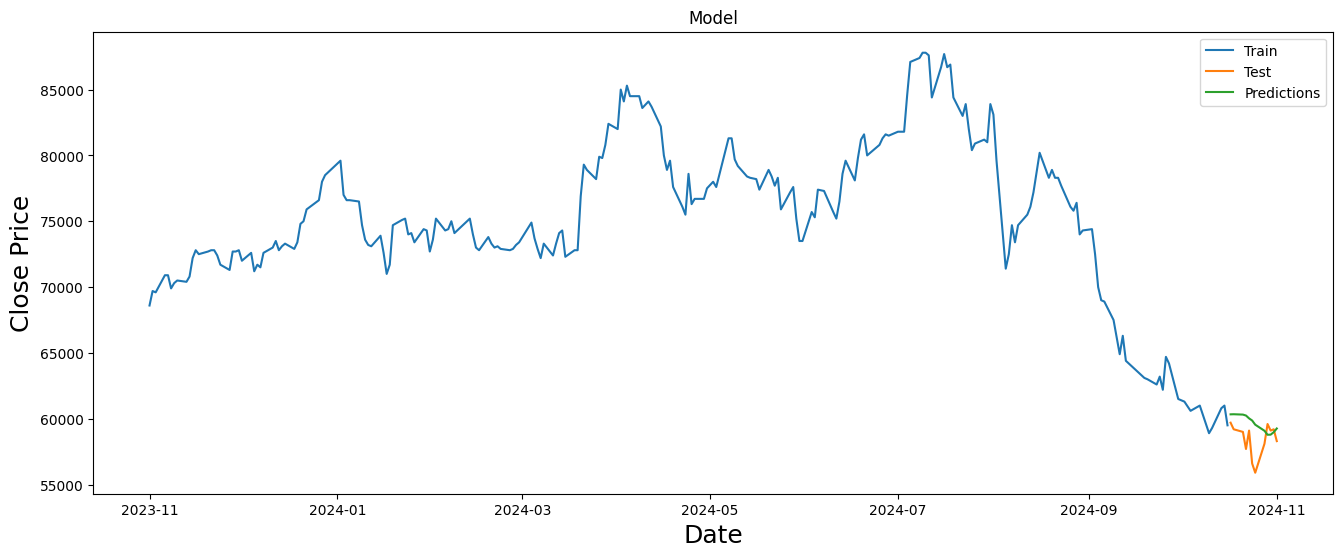

In [32]:
data = df.filter(['Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()

In [33]:
print('예측값:{}, 실제값:{}'.format(y_pred[-1], y_test[-1]))

예측값:[59259.465], 실제값:[58300]
